In [1]:
from SiameseNet import SiameseNet
import torch
import torch.onnx as onnx
from torch.autograd import Variable
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
matplotlib.rcParams['font.family'] = "serif"
matplotlib.style.use('fivethirtyeight')
sns.set_context('poster', font_scale=1.6,  rc={"lines.linewidth": 5})
sns.set_style("ticks")

In [3]:
net = SiameseNet()

In [4]:
dummy_input = Variable(torch.randn(1000, 2, 14, 14))
torch.onnx.export(net, dummy_input, "snn_aux.onnx")

In [5]:
!ls

Architecture.pdf          data                      test_accuracy.pt
Archive                   dlc_practical_prologue.py test_loss.pt
LeNet.py                  snn_aux.onnx              train_acc.pdf
LeNet_train.py            test.py                   train_accuracy.pt
PairDataset.py            test0.pdf                 train_loss.pt
SiameseNet.py             test1.pdf                 train_records.txt
SiameseNetworks_train.py  test2.pdf                 train_time.pdf
Visualisation.ipynb       test3.pdf                 train_time.pt
__pycache__               test_acc.pdf


In [6]:
def convert_to_np(x):
    return x.numpy()

In [7]:
train_accuracy = list(map(convert_to_np, torch.load('train_accuracy.pt')))
train_loss = list(map(convert_to_np, torch.load('train_loss.pt')))
test_accuracy = list(map(convert_to_np, torch.load('test_accuracy.pt')))
test_loss = list(map(convert_to_np, torch.load('test_loss.pt')))
train_time = list(map(convert_to_np, torch.load('train_time.pt')))

In [8]:
def get_stat(x):
    mean_x = np.mean(x, axis=0)
    std_x = np.std(x, axis=0)
    return mean_x, std_x

In [9]:
epoch = np.arange(25)+1
para = [[0, 0], [0, 1], [1, 0], [1, 1]]

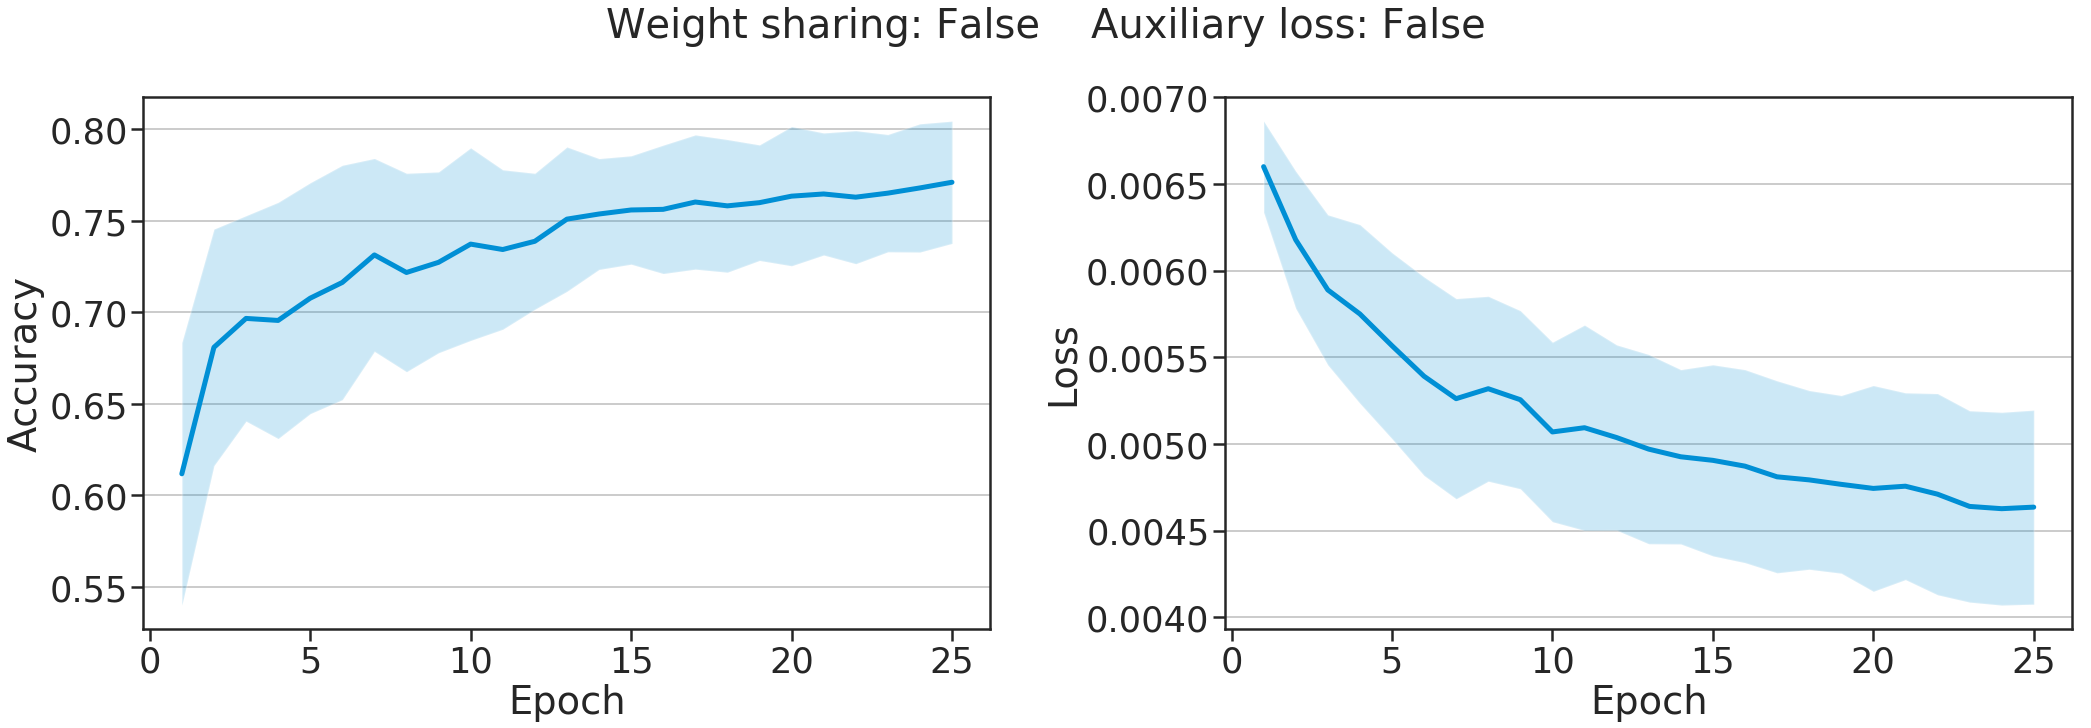

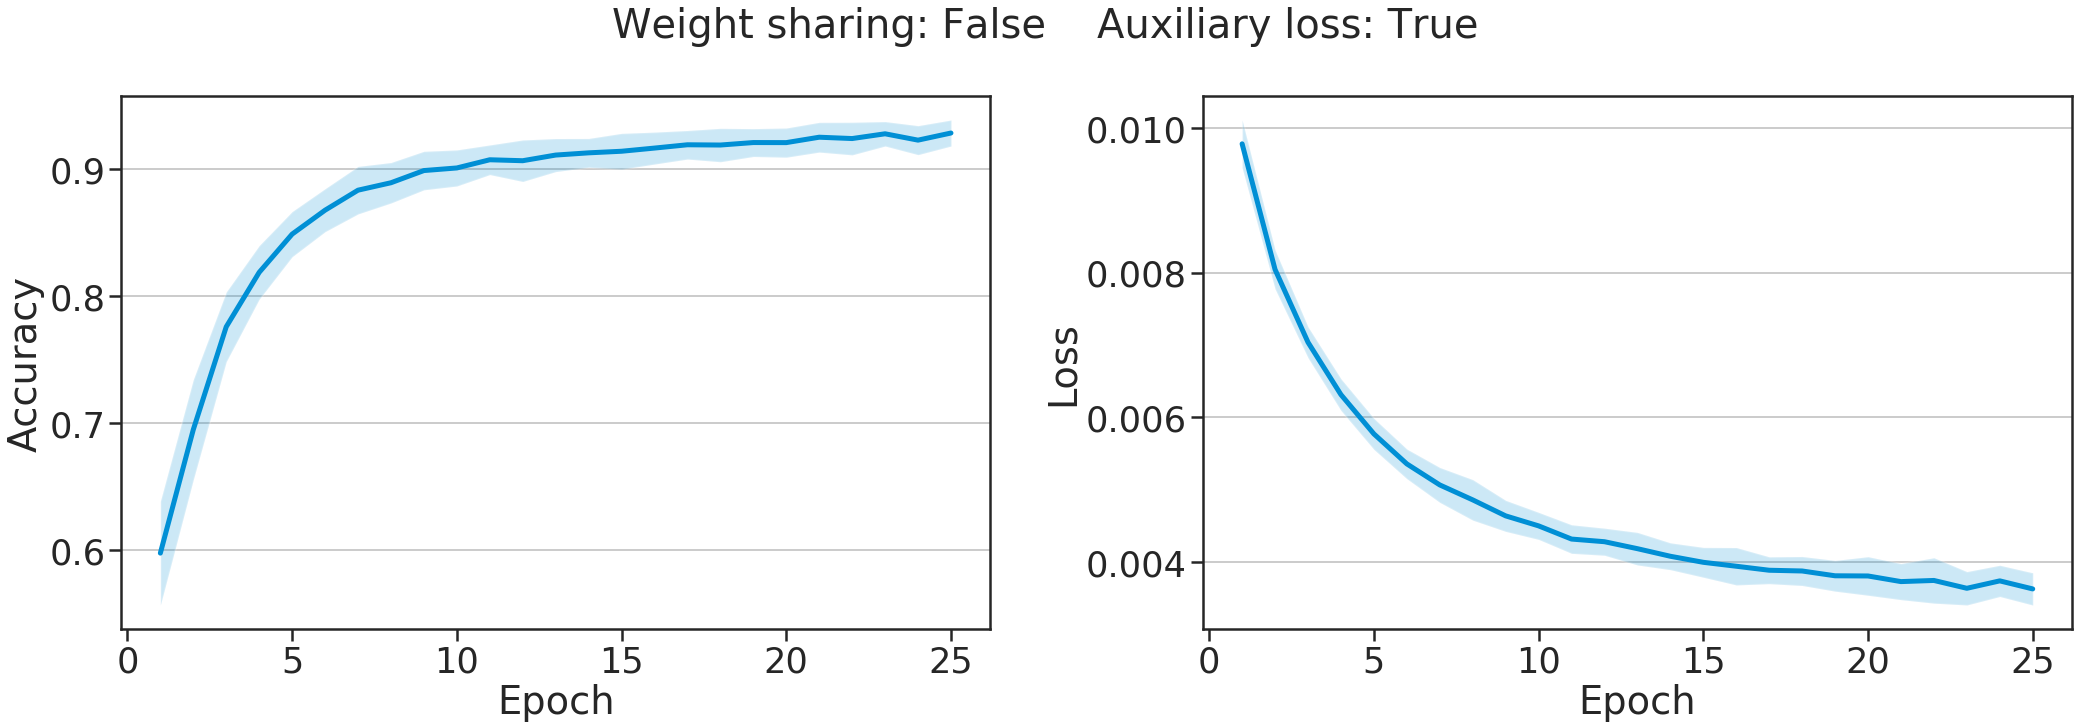

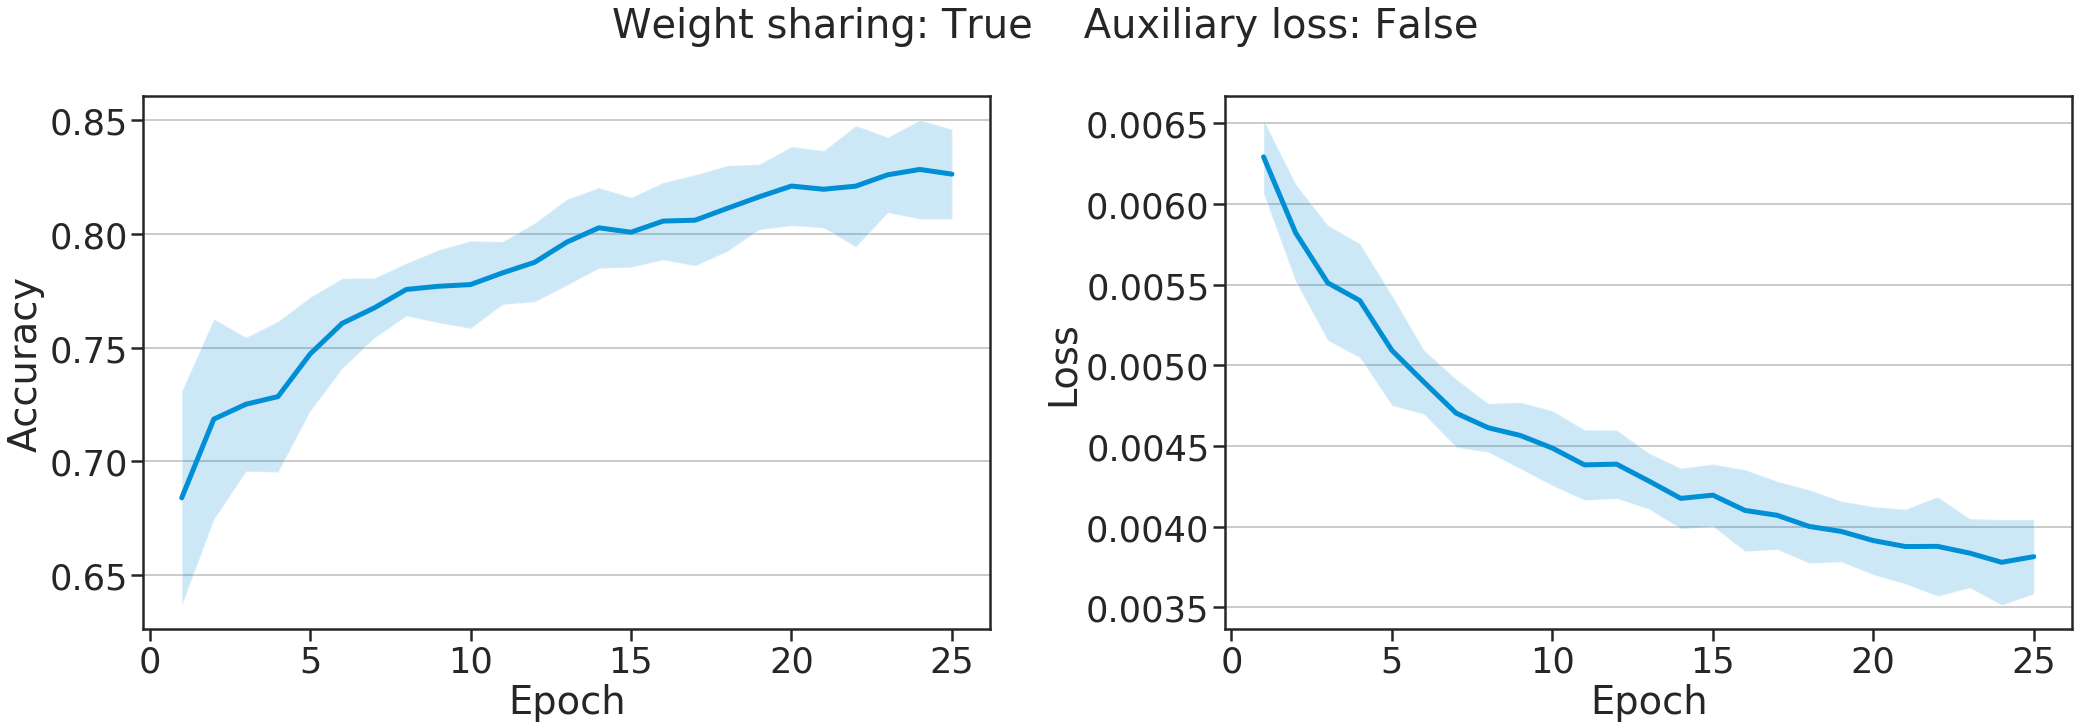

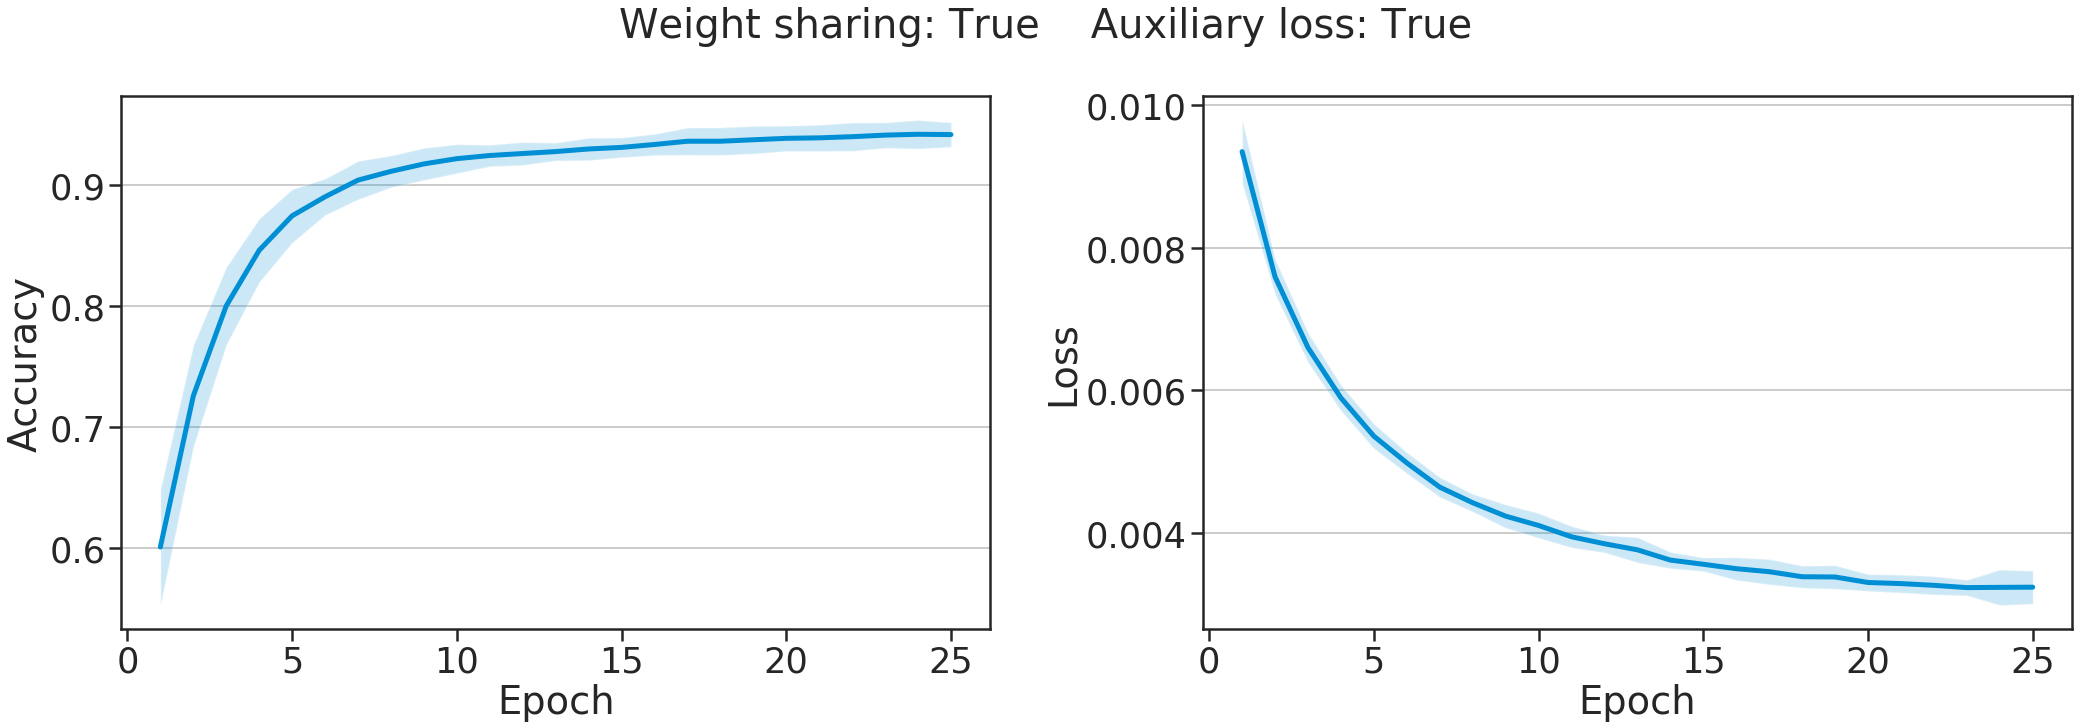

In [10]:
for idx, (acc, loss) in enumerate(zip(test_accuracy, test_loss)):
    plt.figure(figsize=(30, 10))
    plt.subplot(1, 2, 1)
    acc_temp_1, acc_temp_2 = get_stat(acc)
    loss_temp_1, loss_temp_2 = get_stat(loss)
    
    plt.plot(epoch, acc_temp_1)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(axis='y')
    plt.fill_between(epoch, acc_temp_1 - acc_temp_2, acc_temp_1 + acc_temp_2, alpha = 0.2)
    
    plt.subplot(1, 2, 2)
    plt.plot(epoch, loss_temp_1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(axis='y')
    plt.fill_between(epoch, loss_temp_1 - loss_temp_2, loss_temp_1 + loss_temp_2, alpha = 0.2)
    plt.tight_layout()
    plt.suptitle('Weight sharing: %s    Auxiliary loss: %s' % (str(bool(para[idx][0])), str(bool(para[idx][1]))), fontsize = 40,y=1.05)
    plt.savefig('test%s.pdf' % str(idx), bbox_inches='tight', transparent=True)
    

In [11]:
train_time[0].shape

(20, 25)

In [12]:
train_acc_mean = [np.mean(np.max(i, axis=1)) for i in train_accuracy]
train_acc_err = [np.std(np.max(i, axis=1)) for i in train_accuracy]

In [13]:
test_acc_mean = [np.mean(np.max(i, axis=1)) for i in test_accuracy]
test_acc_err = [np.std(np.max(i, axis=1)) for i in test_accuracy]

In [14]:
train_time_mean = [np.mean(np.sum(i, axis=1)) for i in train_time]
train_time_err = [np.std(np.sum(i, axis=1)) for i in train_time]

In [15]:
x_name = ['W:0 A:0', 'W:0 A:1', 'W:1 A:0', 'W:1 A:1']

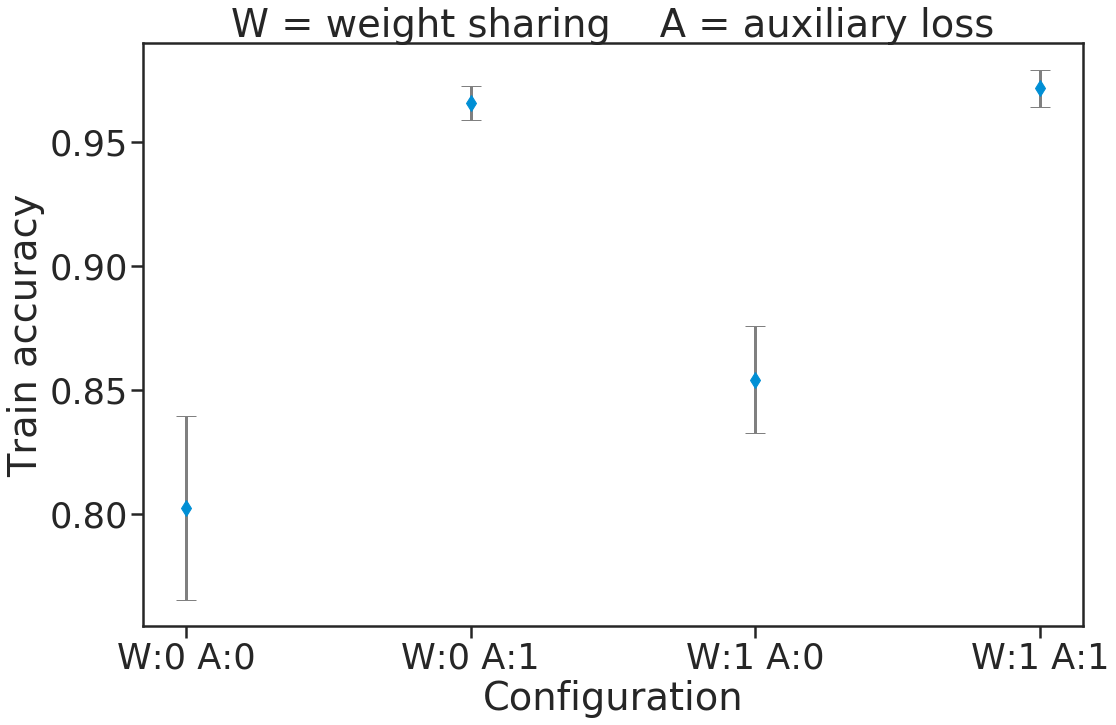

In [16]:
plt.figure(figsize=(15, 10))
plt.xlabel("Configuration")
plt.ylabel("Train accuracy")
plt.title("W = weight sharing    A = auxiliary loss")
plt.errorbar(x_name, train_acc_mean, yerr=train_acc_err, fmt='d',
             ecolor='gray', elinewidth=3, capsize=10)
plt.savefig('train_acc.pdf', bbox_inches='tight', transparent=True)

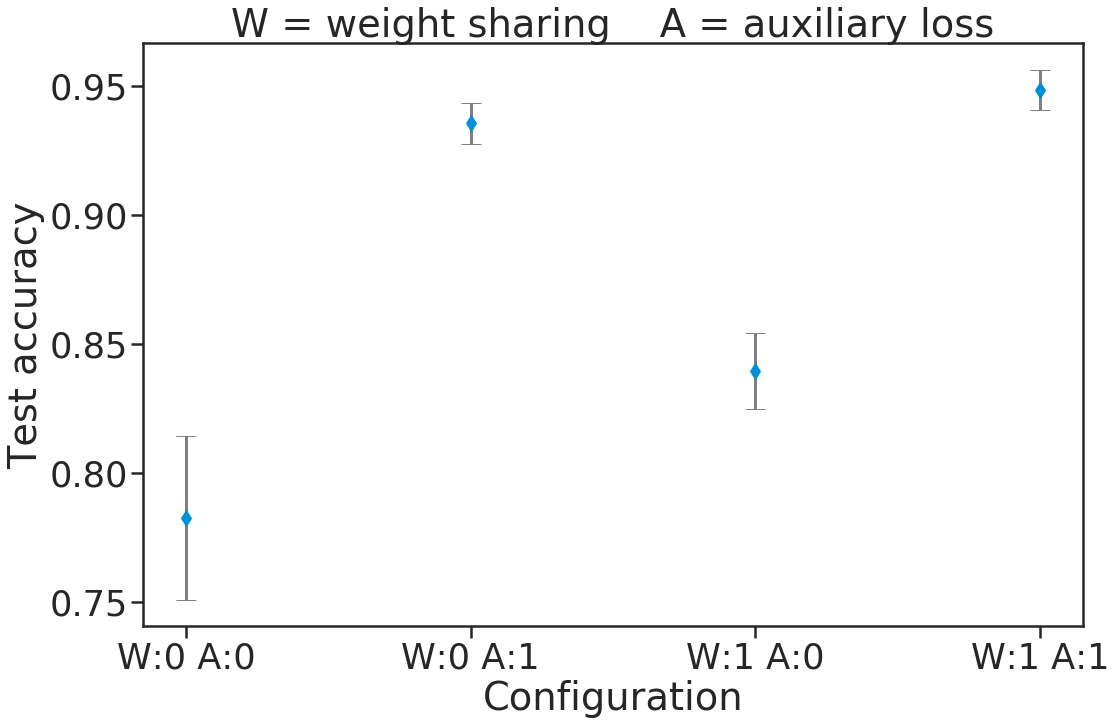

In [17]:
plt.figure(figsize=(15, 10))
plt.xlabel("Configuration")
plt.ylabel("Test accuracy")
plt.title("W = weight sharing    A = auxiliary loss")
plt.errorbar(x_name, test_acc_mean, yerr=test_acc_err, fmt='d',
             ecolor='gray', elinewidth=3, capsize=10)
plt.savefig('test_acc.pdf', bbox_inches='tight', transparent=True)

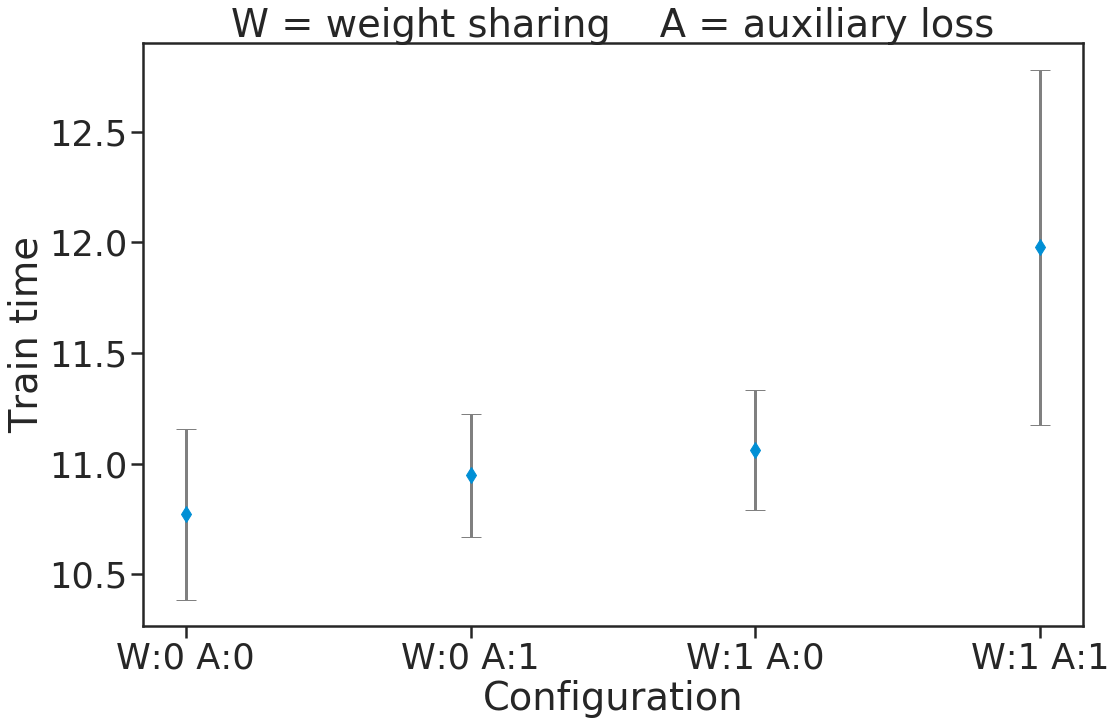

In [18]:
plt.figure(figsize=(15, 10))
plt.xlabel("Configuration")
plt.ylabel("Train time")
plt.title("W = weight sharing    A = auxiliary loss")
plt.errorbar(x_name, train_time_mean, yerr=train_time_err, fmt='d',
             ecolor='gray', elinewidth=3, capsize=10)
plt.savefig('train_time.pdf', bbox_inches='tight', transparent=True)